Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina<br>
#### Bruno Griep Fernandes
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$

# Exercício 3: Regressão Logística


# 1. Conjunto de dados #1
### Sem adição de novos atributos

O arquivo `data1.txt`, fornece a pontuação de alunos em dois exames e a decisão se o aluno é aceito em uma universidade.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [2]:
def plotDataset(X, y):
    y = y.flatten()
    plt.plot(X[y==0,1],X[y==0,2],'bo',X[y==1,1],X[y==1,2],'rx')

def plotBoundary(X, w, N=1000):
    x1 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    x2 = np.linspace(X[:,2].min(), X[:,2].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.column_stack((xx1.reshape(-1),xx2.reshape(-1)))
    X = mapFeature(X)
    y_hat = predict(X,w).reshape(xx1.shape)
    y_hat = (y_hat>=0.5)*2-1
    plt.contourf(xx1,xx2,y_hat,cmap=plt.cm.bwr,vmin=-5,vmax=5)

In [3]:
df = pd.read_csv("data1.txt", header=None)
df.head(3)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


In [4]:
def σ(z):
    return 1/(1 + np.exp(-z))

def cost(w,X,y):
    m = len(y)
    y_hat = σ(X.dot(w))
    J = y.T.dot(np.log(y_hat)) + (1-y).T.dot(np.log(1 - y_hat))
    J = -J/m
    return J

def addOnesColumn(X):
    return np.hstack((np.ones((X.shape[0],1)),X))

def mapFeature(X):
    ### Define as modificações da matriz de atributos (adiciona a coluna de uns, nesse caso)
    X_hat = np.column_stack((X,))
    X_ext = np.ones([X_hat.shape[0],X_hat.shape[1]+1]) 
    X_ext[:,1:] = X_hat
    return X_ext

def train(X,y):
    w = opt.minimize(fun=cost, x0=np.zeros(X.shape[1]), jac=gradient, args=(X,y)).x
    return w

def gradient(w, X, y):
    wr = w.reshape(X.shape[1],1);    
    grad = X.T.dot(σ(X.dot(wr))-y)
    
    grad_J = grad/len(y)                 
    return grad_J.flatten()

def predict(X,w):
    y_hat = σ(X.dot(w))
    return y_hat
    
def trainNorm(X,y):
    means = X.mean(axis=0)
    sigmas = X.std(axis=0)
    X_hat = (X-means)/sigmas
    X_hat[:,0] = X[:,0]

    w = opt.minimize(fun=cost, x0=np.zeros(X.shape[1]), jac=gradient, args=(X_hat,y)).x
    w_hat = w.copy()
    w_hat[1:] = w[1:]/sigmas[1:];
    w_hat[0] = w[0]- (w[1:]/sigmas[1:]).dot(means[1:])
    return w_hat

def accuracyRate(w,X,y):
    y_hat = (predict(X,w)>0.5)*1
    hits = list((y_hat == y)).count(True)
    rate = hits/len(y)
    return rate


In [5]:
X = np.array(df[[0,1]][:])
#X = addOnesColumn(X)
X = mapFeature(X)
y = df[2][:]
y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


In [6]:
w = train(X,y)
w

/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [7]:
w_norm = trainNorm(X,y)
w_norm

/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


array([-25.16056945,   0.20622963,   0.20146073])

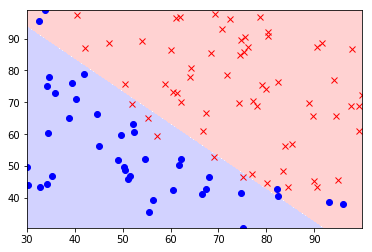

In [8]:
plotDataset(X,y)
plotBoundary(X,w)

In [9]:
TaxaAcertos = accuracyRate(w.reshape(-1,1),X,y)
print("Taxa de Erros: ", (1-TaxaAcertos))

Taxa de Erros:  0.10999999999999999


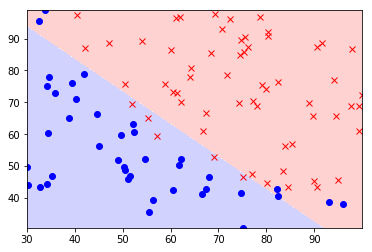

In [10]:
plotDataset(X,y)
plotBoundary(X,w_norm)

In [11]:
TaxaAcertosNorm = accuracyRate(w_norm.reshape(-1,1),X,y)
print("Taxa de Erros: ", (1-TaxaAcertosNorm))

Taxa de Erros:  0.10999999999999999


# 1. Conjunto de dados #1
### Com adição de novos atributos

In [12]:
def mapFeature(X):
    ### Define as modificações da matriz de atributos (adiciona a coluna de uns, nesse caso)
    X_hat = np.column_stack((X,X**2))
    X_ext = np.ones([X_hat.shape[0],X_hat.shape[1]+1]) 
    X_ext[:,1:] = X_hat
    return X_ext

In [13]:
X2 = np.array(df[[0,1]][:])
X2 = mapFeature(X2)
y2 = df[2][:]
y2 = np.array(y2).reshape(-1,1)
print(X2.shape)
print(y2.shape)

(100, 5)
(100, 1)


/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


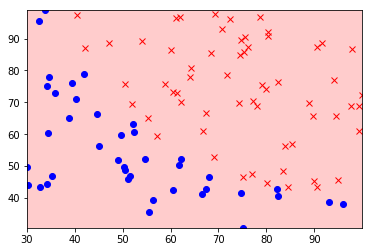

In [14]:
w2 = train(X2,y2)
plotDataset(X2,y2)
plotBoundary(X2,w2)

In [15]:
TaxaAcertos2 = accuracyRate(w2.reshape(-1,1),X2,y2)
print("Taxa de Erros: ", (1-TaxaAcertos2))

Taxa de Erros:  0.6


Aqui pode-se notar que sem normalizar os atributos da tudo errado.

In [16]:
w2_norm = trainNorm(X2,y2)

/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


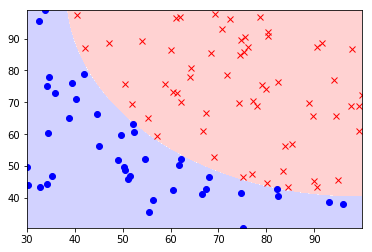

In [17]:
plotDataset(X2,y2)
plotBoundary(X2,w2_norm)

In [18]:
TaxaAcertos2 = accuracyRate(w2_norm.reshape(-1,1),X2,y2)
print("Taxa de Erros: ", (1-TaxaAcertos2))

Taxa de Erros:  0.0


### Neste Ponto já foi possível conseguir uma acurácia de 100%
Por curiosidade de como ficaria com mais atributos ainda continuei o procedimento, mesmo não precisando tendo em vista que tem 100% de acertos.

# 1. Conjunto de dados #1
### Com mais atributos ainda

In [19]:
def mapFeature(X):
    ### Define as modificações da matriz de atributos (adiciona a coluna de uns, nesse caso)
    X_hat = np.column_stack((X,X**2,X**3))
    X_ext = np.ones([X_hat.shape[0],X_hat.shape[1]+1]) 
    X_ext[:,1:] = X_hat
    return X_ext

In [20]:
X3 = np.array(df[[0,1]][:])
X3 = mapFeature(X3)
y3 = df[2][:]
y3 = np.array(y3).reshape(-1,1)
print(X3.shape)
print(y3.shape)

(100, 7)
(100, 1)


/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


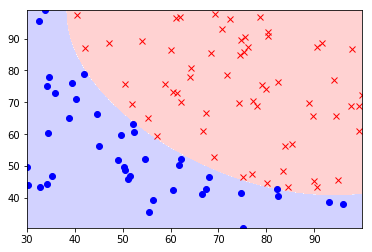

In [21]:
w3 = trainNorm(X3,y3)
plotDataset(X3,y3)
plotBoundary(X3,w3)

In [22]:
TaxaAcertos3 = accuracyRate(w3.reshape(-1,1),X3,y3)
print("Taxa de Erros: ", (1-TaxaAcertos3))

Taxa de Erros:  0.0


# 2. Conjunto de dados #2
### Sem regularização

O segundo conjunto de dados que usaremos, disponibilizado no arquivo `data2.txt`, relaciona os resultados de dois testes realizados em microchips, bem como a decisão se o microchip passou ou não no controle de qualidade.

1. Treine um classificador por regressão logística sem regularização e trace um gráfico mostrando o conjunto de dados e as regiões de decisão. Reporte também a taxa de erro (= # de classificações erradas / tamanho do conjunto).

2. Repita o item anterior adicionando atributos polinomiais, incluindo termos cruzados (até no máximo grau 6).

3. Adicione regularização no treinamento, ajuste o parâmetro de regularização e verifique qualitativamente a variação das regiões de decisão, bem como da taxa de acerto.

In [23]:
df2 = pd.read_csv("data2.txt", header=None)
df2.head(3)

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1


In [24]:
def mapFeature(X):
    ### Define as modificações da matriz de atributos (adiciona a coluna de uns, nesse caso)
    X_hat = np.column_stack((X,))
    X_ext = np.ones([X_hat.shape[0],X_hat.shape[1]+1]) 
    X_ext[:,1:] = X_hat
    return X_ext

In [25]:
X = np.array(df2[[0,1]][:])
#X = addOnesColumn(X)
X = mapFeature(X)
y = df2[2][:]
y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

(118, 3)
(118, 1)


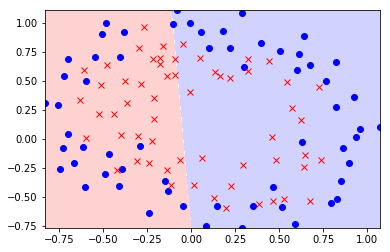

In [26]:
w = train(X,y).reshape(-1,1)
plotDataset(X,y)
plotBoundary(X,w)

In [27]:
TaxaAcertos = accuracyRate(w.reshape(-1,1),X,y)
print("Taxa de Erros: ", (1-TaxaAcertos))

Taxa de Erros:  0.4491525423728814


# 2. Conjunto de dados #2
### Mais atributos 
### Sem regularização

In [28]:
def mapFeature(X):
    ### Define as modificações da matriz de atributos (adiciona a coluna de uns, nesse caso)
    X_hat = np.column_stack((X,X**2))
    X_ext = np.ones([X_hat.shape[0],X_hat.shape[1]+1]) 
    X_ext[:,1:] = X_hat
    return X_ext

(118, 5)
(118, 1)
Taxa de Erros:  0.19491525423728817


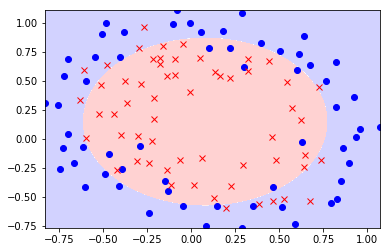

In [29]:
X = np.array(df2[[0,1]][:])
#X = addOnesColumn(X)
X = mapFeature(X)
y = df2[2][:]
y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

w = train(X,y).reshape(-1,1)
plotDataset(X,y)
plotBoundary(X,w)

TaxaAcertos = accuracyRate(w.reshape(-1,1),X,y)
print("Taxa de Erros: ", (1-TaxaAcertos))

# 2. Conjunto de dados #2
### Sem Regularização
### Com elementos cruzados

In [30]:
def mapFeature(X):
    ### Define as modificações da matriz de atributos (adiciona a coluna de uns, nesse caso)
    X_hat = np.column_stack((X,X**2, X[:,0]*X[:,1]))
    X_ext = np.ones([X_hat.shape[0],X_hat.shape[1]+1]) 
    X_ext[:,1:] = X_hat
    return X_ext

(118, 6)
(118, 1)
Taxa de Erros:  0.14406779661016944


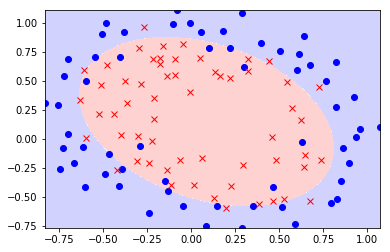

In [31]:
X = np.array(df2[[0,1]][:])
#X = addOnesColumn(X)
X = mapFeature(X)
y = df2[2][:]
y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

w = train(X,y).reshape(-1,1)
plotDataset(X,y)
plotBoundary(X,w)

TaxaAcertos = accuracyRate(w.reshape(-1,1),X,y)
print("Taxa de Erros: ", (1-TaxaAcertos))

# 2. Conjunto de dados #2
### Sem Regularização
### Com elementos cruzados até polinômio de ordem 6

In [32]:
def mapFeature(X):
    ### Define as modificações da matriz de atributos (adiciona a coluna de uns, nesse caso)
    X_hat = np.column_stack((X,X**2, X[:,0]*X[:,1], X**3, (X[:,0]*X[:,1])**2, X**4, (X[:,0]*X[:,1])**4, X**5,\
                             (X[:,0]*X[:,1])**5,X**6, (X[:,0]*X[:,1])**6,))
    X_ext = np.ones([X_hat.shape[0],X_hat.shape[1]+1]) 
    X_ext[:,1:] = X_hat
    return X_ext

(118, 18)
(118, 1)


/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Taxa de Erros:  0.11864406779661019


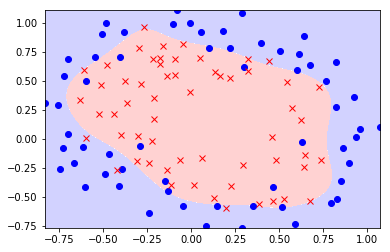

In [33]:
X = np.array(df2[[0,1]][:])
X = mapFeature(X)
y = df2[2][:]
y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

w = train(X,y).reshape(-1,1)
plotDataset(X,y)
plotBoundary(X,w)

TaxaAcertos = accuracyRate(w.reshape(-1,1),X,y)
print("Taxa de Erros: ", (1-TaxaAcertos))

# 2. Conjunto de dados #2
### Com Regularização
### Com elementos cruzados até polinômio de ordem 6

In [34]:
def trainReg2(X,y,lamb):
    means = X.mean(axis=0)
    sigmas = X.std(axis=0)
    X_hat = (X-means)/sigmas
    X_hat[:,0] = X[:,0]

    w = opt.minimize(fun=cost, x0=np.zeros(X.shape[1]), jac=gradient, args=(X_hat,y,lamb)).x
    w_hat = w.copy()
    w_hat[1:] = w[1:]/sigmas[1:];
    w_hat[0] = w[0]- (w[1:]/sigmas[1:]).dot(means[1:])
    return w_hat

def cost(w, X, y, lambd):
    n = X.shape[1]
    L = np.diag(np.concatenate((np.zeros(1),np.ones(n-1))))
    wr = w.reshape(X.shape[1],1)
    y_hat = σ(X@wr)
    J = -((y.T)@(np.log(y_hat))+((1-y).T)@(np.log(1-y_hat)))/len(y) + (lambd/(2*len(y)))*wr.T@L@wr
    return J

def gradient(w, X, y, lambd):
    n = X.shape[1]
    L = np.diag(np.concatenate((np.zeros(1),np.ones(n-1))))
    wr = w.reshape(X.shape[1],1)    
    grad = (X.T)@(σ(X@wr)-y)/len(y) + (lambd/len(y))*L@wr
    
    return grad.flatten()

# funções gradient e cost retiradas da solução do professor Danilo para o exercício 2

In [35]:
X = np.array(df2[[0,1]][:])
X = mapFeature(X)
y = df2[2][:]
y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

(118, 18)
(118, 1)


/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


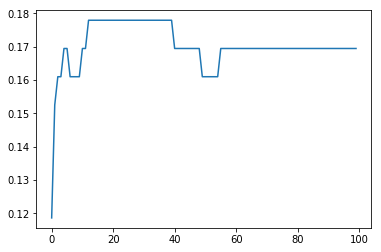

In [36]:
lamb_vec = np.arange(0,10,0.1)
save_erro = []
for lambd in lamb_vec:
    w = trainReg2(X,y,lambd).reshape(-1,1)
    TaxaAcer = accuracyRate(w.reshape(-1,1),X,y)
    erro = 1 - TaxaAcer
    save_erro.append(erro)
plt.plot(save_erro)    


In [37]:
lambd = 0.1
w = trainReg2(X,y,lambd).reshape(-1,1)
w[:3]

/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([[3.4633213 ],
       [1.26512511],
       [4.08347518]])

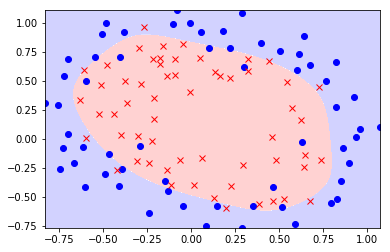

In [38]:
plotDataset(X,y)
plotBoundary(X,w)

In [39]:
TaxaAcertos = accuracyRate(w.reshape(-1,1),X,y)
print("Taxa de Erros: ", (1-TaxaAcertos))

Taxa de Erros:  0.15254237288135597


# 3. Conjunto de dados #3

O terceiro conjunto de dados que usaremos pode ser encontrado aqui:

https://www.kaggle.com/uciml/iris/data

O objetivo é implementar um classificador para classificar entre três tipos de plantas. Implemente apenas regressão logística sem regularização com os atributos originais, e reporte a taxa de erro.

In [40]:
df3 = pd.read_csv("Iris.csv")
df3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
def mapFeature(X):
    X_hat = np.column_stack((X,))
    X_ext = np.ones([X_hat.shape[0],X_hat.shape[1]+1]) 
    X_ext[:,1:] = X_hat
    return X_ext

In [42]:
#X = np.array(df3)[:,[3,4]].astype('float')
Xdf3 = df3[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
X = mapFeature(Xdf3)

y = df3[['Species']][:]
y = np.array(y).reshape(-1,1)
print(Xdf3.shape)
print(y.shape)

(150, 4)
(150, 1)


In [43]:
# Separando nas diferentes espécies
y0 = (df3[['Species']] == 'Iris-setosa').values.reshape(-1,1)
y1 = (df3[['Species']] == 'Iris-versicolor').values.reshape(-1,1)
y2 = (df3[['Species']] == 'Iris-virginica').values.reshape(-1,1)
print(y0.shape)
print(y1.shape)
print(y2.shape)

(150, 1)
(150, 1)
(150, 1)


In [57]:
w0 = trainReg2(X,y0,0.1).reshape(-1,1)
w1 = trainReg2(X,y1,0.1).reshape(-1,1)
w2 = trainReg2(X,y2,0.1).reshape(-1,1)
print("Erro w0 de:",1-accuracyRate(w0,X,y0),"%")
print("Erro w1 de:",1-accuracyRate(w1,X,y1),"%")
print("Erro w2 de:",1-accuracyRate(w2,X,y2),"%")

Erro w0 de: 0.0 %
Erro w1 de: 0.26 %
Erro w2 de: 0.020000000000000018 %


/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [58]:
y0_hat = predict(X,w0)
y1_hat = predict(X,w1)
y2_hat = predict(X,w2)

# 4. (OPCIONAL) Conjunto de dados #4

O último conjunto de dados, disponibilizado no arquivo `modulations.csv`, consiste de atributos extraídos de sinais de telecomunicações que utilizam dois tipos de modulação digital (PSK=0 ou FSK=1). O objetivo é classificar a modulação usada.

Separe 20% dos dados como conjunto de teste e tente minimizar a taxa de erro neste conjunto, usando regressão logística.